## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 

### Criar série temporal, modelo Auto Arima

#### links:
Pandas To Datetime - String to Date - pd.to_datetime() - Data Independent
Python strptime() - string to datetime object (programiz.com)
How to Work With Dates in Python. Parsing, formatting, time zones, and… | by David Mezzetti | Better Programming | Medium




## Importar Pacotes

In [19]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
#from arch import arch_model
import seaborn as sns
#import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importar os dados

In [20]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
bike = pd.read_csv('Bike_Sharing_day.csv', sep=',')


In [21]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
print (bike.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [23]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Manter as variáveis data e cnt

In [24]:
del bike['instant'], bike['season'], bike['yr'], bike['mnth'], bike['holiday'], bike['weekday'], bike['workingday'], bike['weathersit'], bike['temp'], bike['atemp'], bike['hum'], bike['windspeed'], bike['casual'], bike['registered']


In [25]:
bike.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [26]:
bike.index

RangeIndex(start=0, stop=731, step=1)

In [27]:
print (bike.dtypes)

dteday    object
cnt        int64
dtype: object


## Mudar o formato da variável "dteday" para data

In [28]:
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%Y-%m-%d')
bike.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [29]:
print (bike.dtypes)

dteday    datetime64[ns]
cnt                int64
dtype: object


In [30]:
bike.dteday.describe()

count                     731
unique                    731
top       2011-12-14 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

In [31]:
bike.set_index("dteday", inplace=True)

In [32]:
print (bike.dtypes)

cnt    int64
dtype: object


In [33]:
bike.head()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


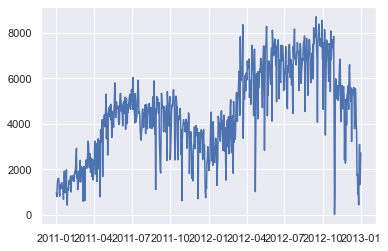

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(bike)

# Importar o Pacote Auto Arima

In [38]:
!pip install pmdarima 
from pmdarima import auto_arima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
model_auto = auto_arima(df.ret_ftse[1:])

In [ ]:
model_auto

In [ ]:
model_auto.summary()